특성과 타겟값의 관계를 잘 표현하는 선형모델을 만드는 클래스를 만들자.
클래스로 만들게 되면 x값에 다른 특성들을 넣어줌으로서 바로 결과를 확인할 수 있다.

In [11]:
from sklearn.datasets import load_diabetes

class Neuron:
    
    # 클래스 출력과 동시에 그 객체에 대한 w와 b는 1로 초기화한다.
    def __init__(self):  
        self.w = 1
        self.b = 1
    
    # 정방향 계산. 우선 y_hat을 찾자.
    def forpass(self, x):
        y_hat = x * self.w + self.b
        return y_hat
    
    # 역전파. 역전파로 구하는 것은 gradient(오차의 변화율)
    # err은 fit함수에서 정의해줄 것임(오차는 x와 y에 따라 계속바뀌기에)
    def backprop(self, x, err):
        w_grad = -err * x   
        # -x(y - y_hat)  가중치 그레디언트라고 부른다. 
        # 가중치에 대한 손실함수(제곱오차)의 변화율
        b_grad = -err * 1
        return w_grad, b_grad
    
    
    def fit(self, x, y, epochs = 100):
        # 필요한 파라미터는 x(특성값), y(타깃값), epochs (얼마나 반복할 것인가)
        for i in range(epochs): # 백번 박복한다.
            for x_i, y_i in zip(x, y):
                # 전체샘플의 특정한 특성값과 타깃값을 하나씩 뽑아서
                y_hat = self.forpass(x_i) # 예측값을 forpass함수로 계산하고
                err = y_i - y_hat # 계산은 예측값으로 오차계산
                w_grad, b_grad = self.backprop(x_i, err) # backprop함수로 gradient계산
                self.w = self.w - w_grad # 가중치 업데이트
                self.b = self.b - b_grad # 절편 업데이트

In [9]:
diabetes = load_diabetes()

x = diabetes.data
y = diabetes.target

x = x[:, 2]

In [10]:
neuron = Neuron()
neuron.fit(x, y)

neuron.w, neuron.b

TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

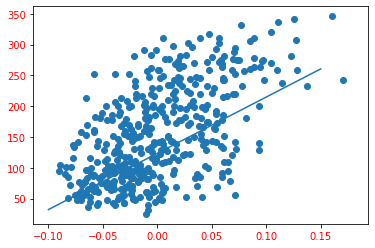

In [36]:
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.xticks(color = 'r')
plt.yticks(color = 'r')
pt1 = (-0.1, -0.1 * neuron.w + neuron.b)
pt2 = (0.15, 0.15 * neuron.w + neuron.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])

In [57]:
x = diabetes.data
x = x[:, 6]  #인덱스가 6이니 우리는 7번째 특성값을 쓰는 것임.

neuron.fit(x, y)

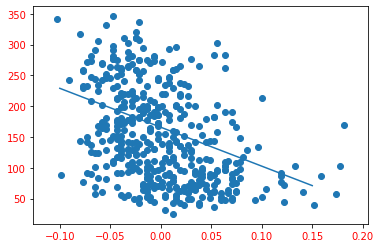

In [58]:
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.xticks(color = 'r')
plt.yticks(color = 'r')
pt1 = (-0.1, -0.1 * neuron.w + neuron.b)
pt2 = (0.15, 0.15 * neuron.w + neuron.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])